In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url)

In [5]:
df.tail(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
355171,ZWE,Africa,Zimbabwe,2023-11-06,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355172,ZWE,Africa,Zimbabwe,2023-11-07,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
355173,ZWE,Africa,Zimbabwe,2023-11-08,265848.0,0.0,0.0,5723.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [10]:
df['life_expectancy'].dtypes

dtype('float64')

**Five Different Plots**

**To know the Extreme Poverty in Different Continent**

C:\Users\Quinn\AppData\Local\Temp\ipykernel_14592\3968010185.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




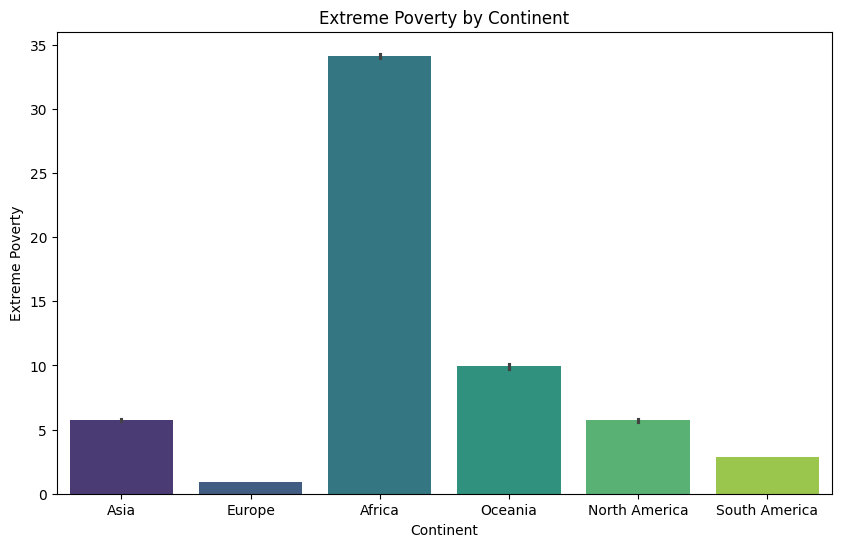

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df,x='continent',y='extreme_poverty',palette='viridis')
plt.title('Extreme Poverty by Continent')
plt.xlabel('Continent')
plt.ylabel('Extreme Poverty')

plt.show()

To know the Life Expectancy in Different Continent

C:\Users\Quinn\AppData\Local\Temp\ipykernel_14592\592602976.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




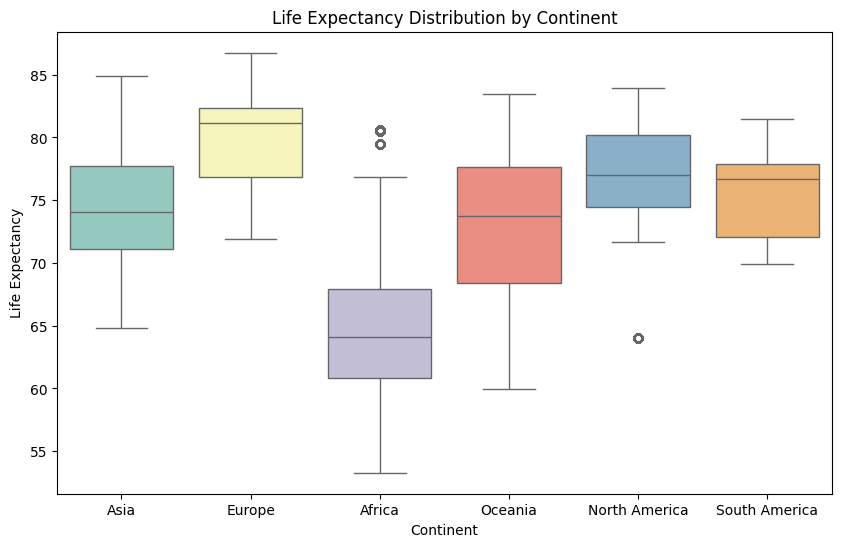

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='continent', y='life_expectancy', palette='Set3')
plt.title('Life Expectancy Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')

plt.show()


To Know Relationship Between Diabetes Prevalence and Life Expectancy in Different Continent

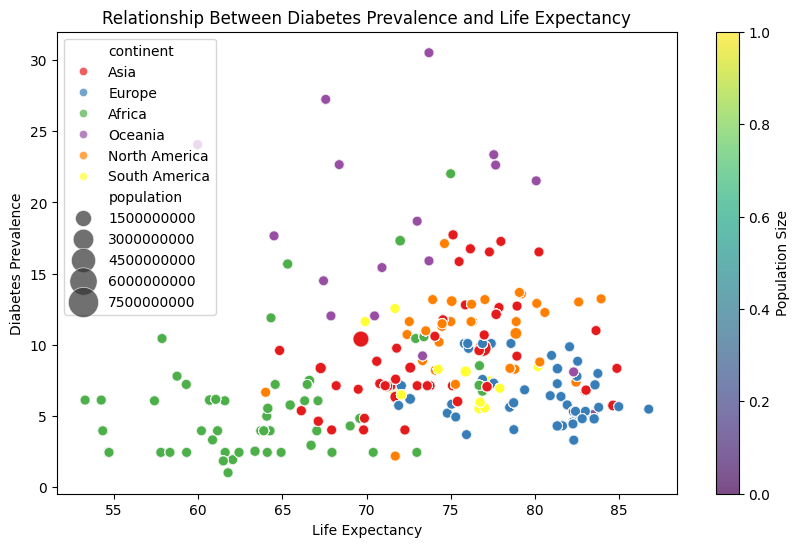

In [5]:
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data=df, x='life_expectancy', y='diabetes_prevalence', hue='continent', size='population', sizes=(50, 500), alpha=0.7, palette='Set1')

plt.title('Relationship Between Diabetes Prevalence and Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Diabetes Prevalence')
plt.legend(loc='upper left')

cbar = plt.colorbar(mappable=scatterplot.collections[0])  # Use the collections attribute to access the mappable
cbar.set_label('Population Size')

plt.show()


To know Fully Vaccinated People in Different Continent

In [15]:
continent_count = df.continent.value_counts().reset_index()
continent_count.columns = ["continent", "people_fully_vaccinated"]
print("Count of vaccinate:",continent_count)

Count of vaccinate:        continent  people_fully_vaccinated
0         Africa                    80143
1         Europe                    76856
2           Asia                    70225
3  North America                    57648
4        Oceania                    33744
5  South America                    19686


In [36]:
fig_continent_vaccinate_count = px.treemap(continent_count, path=[px.Constant("people_fully_vaccinated"), "continent"], values="people_fully_vaccinated").update_layout(title='Vaccinateed People in Different Continent').update_traces(textinfo="label+value")
fig_continent_vaccinate_count

To know Death People in Different Continent

In [40]:
df['cardiovasc_death_rate'].nunique()

196

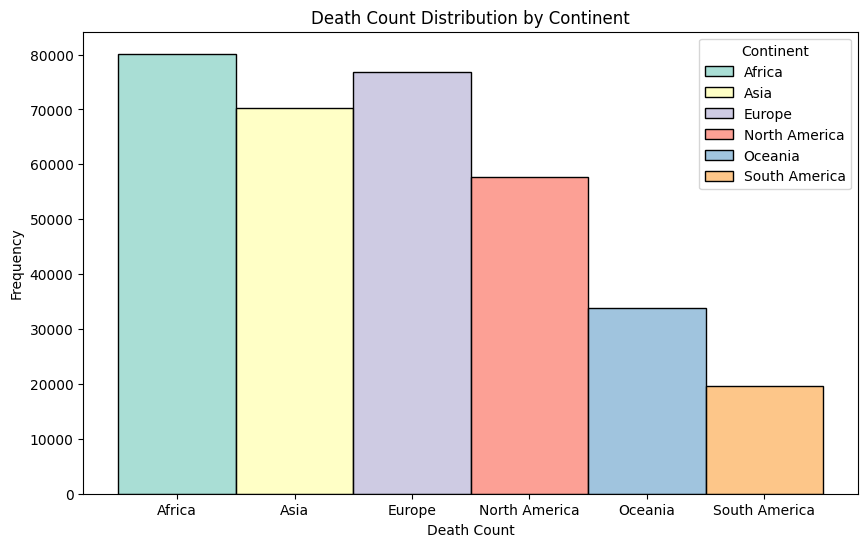

In [6]:
grouped = df.groupby('continent')
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("Set3", len(grouped))

for name, group in grouped:
    sns.histplot(data=group, x='continent', bins=10, label=name, color=colors.pop(0), ax=ax)

ax.set_title('Death Count Distribution by Continent')
ax.set_xlabel('Death Count')
ax.set_ylabel('Frequency')
ax.legend(title='Continent', loc='upper right')

plt.show()
